In [3]:
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [15]:
# import image
background = cv2.imread("/home/ransaka/opensource/computer_vision/testing/out/sin01.png")
background_mask = cv2.imread("/home/ransaka/opensource/computer_vision/testing/out/sin01_mask.png")

In [16]:
background_npy = np.array(background)
background_mask_npy = np.array(background_mask)

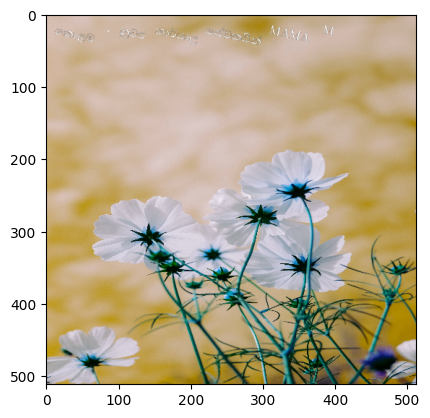

In [18]:
# plot image with bbox
plt.imshow(background_npy)
plt.show()